In [12]:
import pandas as pd # pandas k nacitani dat z excelu
import numpy as np # numpy pro vypocty
import matplotlib.pyplot as plt # vykreslovani grafu
from scipy import signal 
from decimal import Decimal # zaokrouhlovani na jednu platnou cifru

In [13]:
sample_a = pd.read_csv("samples/sample_a.txt", skiprows=1) # rubínový krystal
sample_b = pd.read_csv("samples/sample_b.txt", skiprows=1) # dielektrický úzkopásmový filtr pro rubínový laser
sample_c = pd.read_csv("samples/sample_c.txt", skiprows=1) # zrcadlo pro rubínový laser
sample_d = pd.read_csv("samples/sample_d.txt", skiprows=1) # filtr RG7 (horní propust 700 nm)
sample_e = pd.read_csv("samples/sample_e.txt", skiprows=1) # zrcadlo pro Nd:YAG laser
sample_f = pd.read_csv("samples/sample_f.txt", skiprows=1) # ochranné brýlové sklo pro práci s Nd:YAG laserem
sample_g = pd.read_csv("samples/sample_g.txt", skiprows=1) # infračervený filtr (horní propust 600 nm)
sample_h = pd.read_csv("samples/sample_h.txt", skiprows=1) # křemíková destička
sample_i = pd.read_csv("samples/sample_i.txt", skiprows=1) # sklo z černých brýlí
sample_bily = pd.read_csv("samples/sample_bily.txt", skiprows=1) # Er:sklo
sample_modry = pd.read_csv("samples/sample_modry.txt", skiprows=1) # Nd:YVO4
sample_cerveny = pd.read_csv("samples/sample_cerveny.txt", skiprows=1) # Cr:YAG

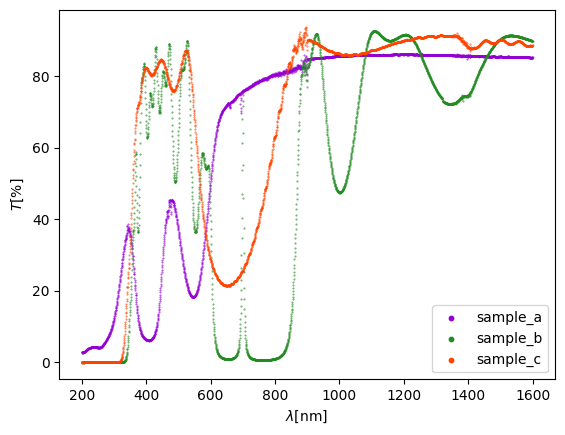

In [14]:
fig_samples_abc = plt.figure()

plt.scatter(sample_a["Wavelength nm."], sample_a["T%"], 
            color="darkviolet", 
            marker=".", s=1, alpha=0.7,
            label="sample_a")
plt.scatter(sample_b["Wavelength nm."], sample_b["T%"], 
            color="forestgreen", 
            marker=".", s=1, alpha=0.7,
            label="sample_b")
plt.scatter(sample_c["Wavelength nm."], sample_c["T%"], 
            color="orangered", 
            marker=".", s=1, alpha=0.7,
            label="sample_c")

lgnd = plt.legend(scatterpoints=1, fontsize=10)
for handle in lgnd.legend_handles:
    handle.set_sizes([40])
    handle.set_alpha(1)

plt.xlabel('$\\lambda\\mathrm{[nm]}$ ', fontsize = 10)
plt.ylabel("$T\\mathrm{[\\%]}$", fontsize = 10)
plt.savefig("img_05/samples_abc.pdf")
plt.show()



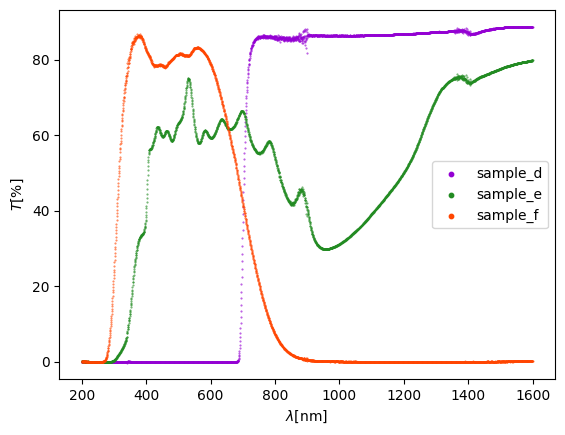

In [15]:
fig_samples_def = plt.figure()

plt.scatter(sample_d["Wavelength nm."], sample_d["T%"], 
            color="darkviolet", 
            marker=".", s=1, alpha=0.7,
            label="sample_d")
plt.scatter(sample_e["Wavelength nm."], sample_e["T%"], 
            color="forestgreen", 
            marker=".", s=1, alpha=0.7,
            label="sample_e")
plt.scatter(sample_f["Wavelength nm."], sample_f["T%"], 
            color="orangered", 
            marker=".", s=1, alpha=0.7,
            label="sample_f")

lgnd = plt.legend(scatterpoints=1, fontsize=10)
for handle in lgnd.legend_handles:
    handle.set_sizes([40])
    handle.set_alpha(1)

plt.xlabel('$\\lambda\\mathrm{[nm]}$ ', fontsize = 10)
plt.ylabel("$T\\mathrm{[\\%]}$", fontsize = 10)
plt.savefig("img_05/samples_def.pdf")
plt.show()

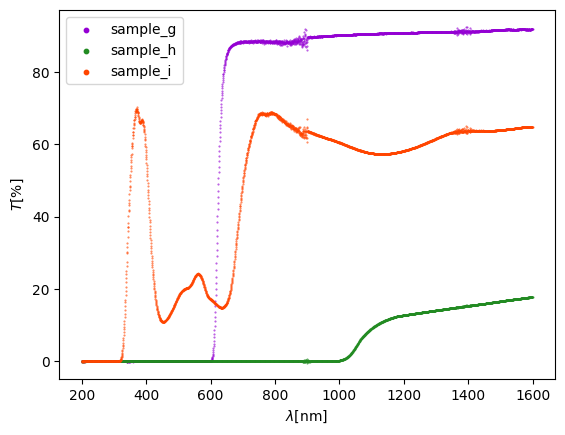

In [16]:
fig_samples_ghi = plt.figure()

plt.scatter(sample_g["Wavelength nm."], sample_g["T%"], 
            color="darkviolet", 
            marker=".", s=1, alpha=0.7,
            label="sample_g")
plt.scatter(sample_h["Wavelength nm."], sample_h["T%"], 
            color="forestgreen", 
            marker=".", s=1, alpha=0.7,
            label="sample_h")
plt.scatter(sample_i["Wavelength nm."], sample_i["T%"], 
            color="orangered", 
            marker=".", s=1, alpha=0.7,
            label="sample_i")

lgnd = plt.legend(scatterpoints=1, fontsize=10)
for handle in lgnd.legend_handles:
    handle.set_sizes([40])
    handle.set_alpha(1)

plt.xlabel('$\\lambda\\mathrm{[nm]}$ ', fontsize = 10)
plt.ylabel("$T\\mathrm{[\\%]}$", fontsize = 10)
plt.savefig("img_05/samples_ghi.pdf")
plt.show()

sirka peaku = [11.25145746]
vyska peaku = [72.768]


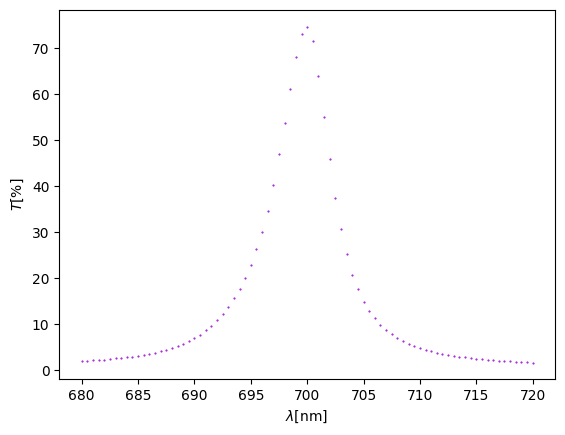

In [36]:
peak_filtr_rubin = sample_b[sample_b["Wavelength nm."].between(680, 720)]
peak, _ = signal.find_peaks(peak_filtr_rubin["T%"])
fwhm_filtr_rubin = signal.peak_widths(peak_filtr_rubin["T%"], peak, rel_height=0.5)
vyska_peak_rubin = signal.peak_prominences(peak_filtr_rubin["T%"], peak)
print(f"sirka peaku = {fwhm_filtr_rubin[0]}")
print(f"vyska peaku = {vyska_peak_rubin[0]}")

fig_peak_filtr_rubin = plt.figure()

plt.scatter(peak_filtr_rubin["Wavelength nm."], peak_filtr_rubin["T%"], 
            color="darkviolet", 
            marker=".", s=1, alpha=1)


#lgnd = plt.legend(scatterpoints=1, fontsize=10)
#for handle in lgnd.legend_handles:
#    handle.set_sizes([40])
#    handle.set_alpha(1)

plt.xlabel('$\\lambda\\mathrm{[nm]}$ ', fontsize = 10)
plt.ylabel("$T\\mathrm{[\\%]}$", fontsize = 10)
#plt.savefig("img_05/samples_def.pdf")
plt.show()

420    410.0
691    545.5
986    693.0
Name: Wavelength nm., dtype: float64
sirka peaku = [162.36112546 142.28899362   1.83403988]
vyska peaku = [32.541 27.29   5.539]


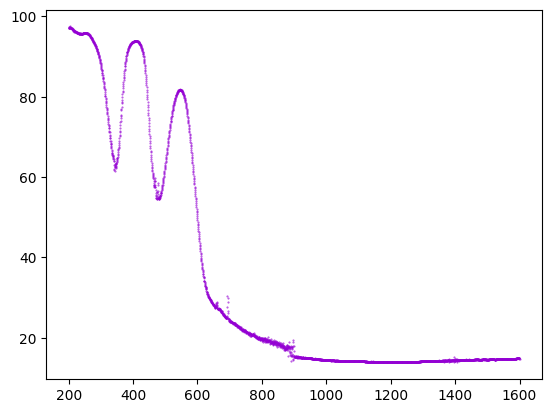

In [72]:
absorpce_krystal_rubin = 100-sample_a["T%"]
#print(absorpce_krystal_rubin)
peaks, _ = signal.find_peaks(absorpce_krystal_rubin, prominence=(5.5, None))
print(sample_a["Wavelength nm."][peaks])

fwhm_peak_absorpce_rubin = signal.peak_widths(absorpce_krystal_rubin, peaks, rel_height=0.5)
vyska_peak_absorpce_rubin = signal.peak_prominences(absorpce_krystal_rubin, peaks)
print(f"sirka peaku = {fwhm_peak_absorpce_rubin[0]}")
print(f"vyska peaku = {vyska_peak_absorpce_rubin[0]}")

fig_peak_filtr_rubin = plt.figure()

plt.scatter(sample_a["Wavelength nm."], absorpce_krystal_rubin, 
            color="darkviolet", 
            marker=".", s=1, alpha=0.7)



#lgnd = plt.legend(scatterpoints=1, fontsize=10)
#for handle in lgnd.legend_handles:
#    handle.set_sizes([40])
#    handle.set_alpha(1)

#plt.xlabel('$\\lambda\\mathrm{[nm]}$ ', fontsize = 10)
#plt.ylabel("$T\\mathrm{[\\%]}$", fontsize = 10)
#plt.savefig("img_05/samples_def.pdf")
#plt.show()